## Тема “Обучение без учителя”
#### Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов 
данных библиотеки sklearn.


Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.


Масштабируйте данные с помощью StandardScaler.


Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.


Постройте диаграмму рассеяния на этих данных.


In [15]:
import warnings

warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error as mse, r2_score as r2
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [3]:
from sklearn.datasets import load_boston
boston = load_boston()
X = pd.DataFrame(boston['data'], columns=boston["feature_names"])
y = pd.DataFrame(boston["target"], columns=['price'])

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [7]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

X_train_tsne = tsne.fit_transform(X_train_scaled)

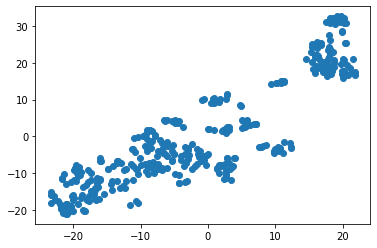

In [10]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

plt.show()

#### Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.


Параметр max_iter должен быть равен 100, random_state сделайте равным 42.


Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.


Вычислите средние значения price и CRIM в разных кластерах.


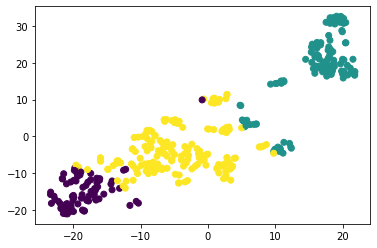

In [17]:
kmeans = KMeans(n_clusters=3, max_iter=300, random_state=42)

labels_train = kmeans.fit_predict(X_train_scaled)

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)

plt.show()

In [18]:
labels_test = kmeans.predict(X_test_scaled)

print('Кластер 0: {}'.format(X_train.loc[labels_train == 0, 'CRIM'].mean()))
print('Кластер 1: {}'.format(X_train.loc[labels_train == 1, 'CRIM'].mean()))
print('Кластер 2: {}'.format(X_train.loc[labels_train == 2, 'CRIM'].mean()))

Кластер 0: 0.07632851351351352
Кластер 1: 10.10463175438597
Кластер 2: 0.4262868674698794


In [19]:
print('Кластер 0: {}'.format(y_train[labels_train == 0].mean()))
print('Кластер 1: {}'.format(y_train[labels_train == 1].mean()))
print('Кластер 2: {}'.format(y_train[labels_train == 2].mean()))

Кластер 0: price    28.089189
dtype: float64
Кластер 0: price    16.402632
dtype: float64
Кластер 0: price    25.295783
dtype: float64


## *Задание 3
Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [31]:
X_test_tsne = tsne.fit_transform(X_test_scaled)

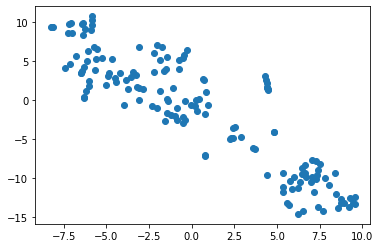

In [30]:
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1])

plt.show()

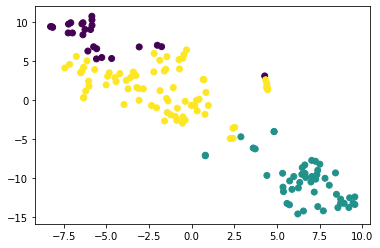

In [23]:
labels_test = kmeans.fit_predict(X_test_scaled)

plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=labels_test)

plt.show()

In [32]:
print('Кластер 0: {}'.format(X_test.loc[labels_test == 0, 'CRIM'].mean()))
print('Кластер 1: {}'.format(X_test.loc[labels_test == 1, 'CRIM'].mean()))
print('Кластер 2: {}'.format(X_test.loc[labels_test == 2, 'CRIM'].mean()))

Кластер 0: 0.06851119999999997
Кластер 1: 11.743134897959182
Кластер 2: 0.29457153846153855


In [33]:
print('Кластер 0: {}'.format(y_test[labels_test == 0].mean()))
print('Кластер 1: {}'.format(y_test[labels_test == 1].mean()))
print('Кластер 2: {}'.format(y_test[labels_test == 2].mean()))

Кластер 0: price    30.492
dtype: float64
Кластер 1: price    15.844898
dtype: float64
Кластер 2: price    21.991026
dtype: float64
